#**Predict Customer Clicked Ads Classification by Using Machine Learning**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Portofolio/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')
pd.pandas.set_option("display.max_columns",None)
df.head(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
5,5,59.99,23,418330920.0,226.74,Laki-Laki,5/19/2016 14:30,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel
6,6,88.91,33,376969950.0,208.36,Perempuan,1/28/2016 20:59,No,Bandung,Jawa Barat,Electronic
7,7,66.00,48,172153310.0,131.76,Laki-Laki,3/7/2016 1:40,Yes,Bandar Lampung,Lampung,Health
8,8,74.53,30,482034000.0,221.51,Laki-Laki,4/18/2016 9:33,No,Batam,Kepulauan Riau,Bank
9,9,69.88,20,389496240.0,183.82,Laki-Laki,7/11/2016 1:42,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Health


##**EDA**

In [4]:
df.shape

(1000, 11)

In [5]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [6]:

df.duplicated().sum()

0

In [7]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [8]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

**Statistical Summary**

In [9]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


In [10]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


**Univariate Analysis**

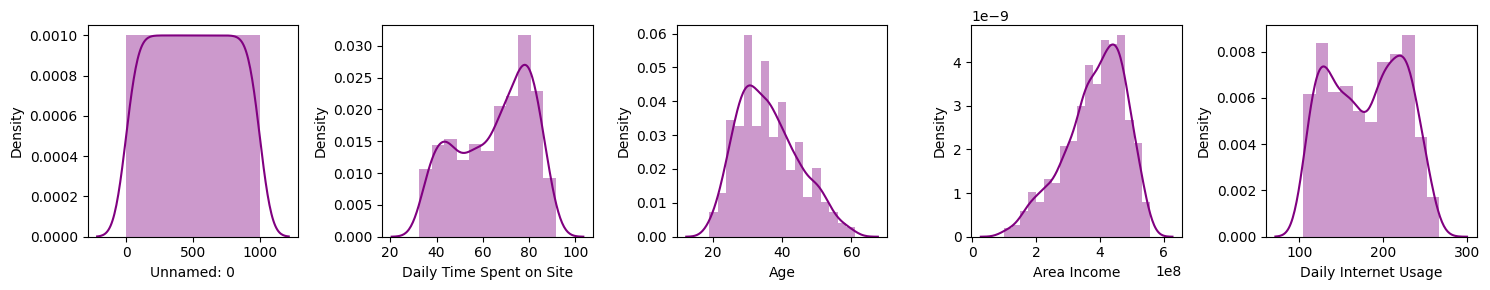

In [11]:
plt.figure(figsize=(15, 3))
colors = ['purple']
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]], color=colors[0])
    plt.tight_layout()


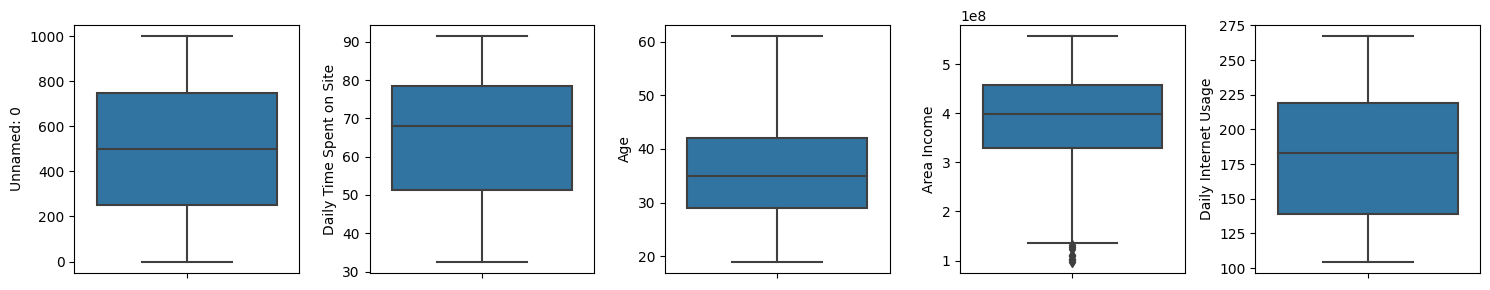

In [12]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

In [13]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
--------------------------------------------------
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
--------------------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
--------------------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
--------------------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tanger

**Bivariate Analysis**

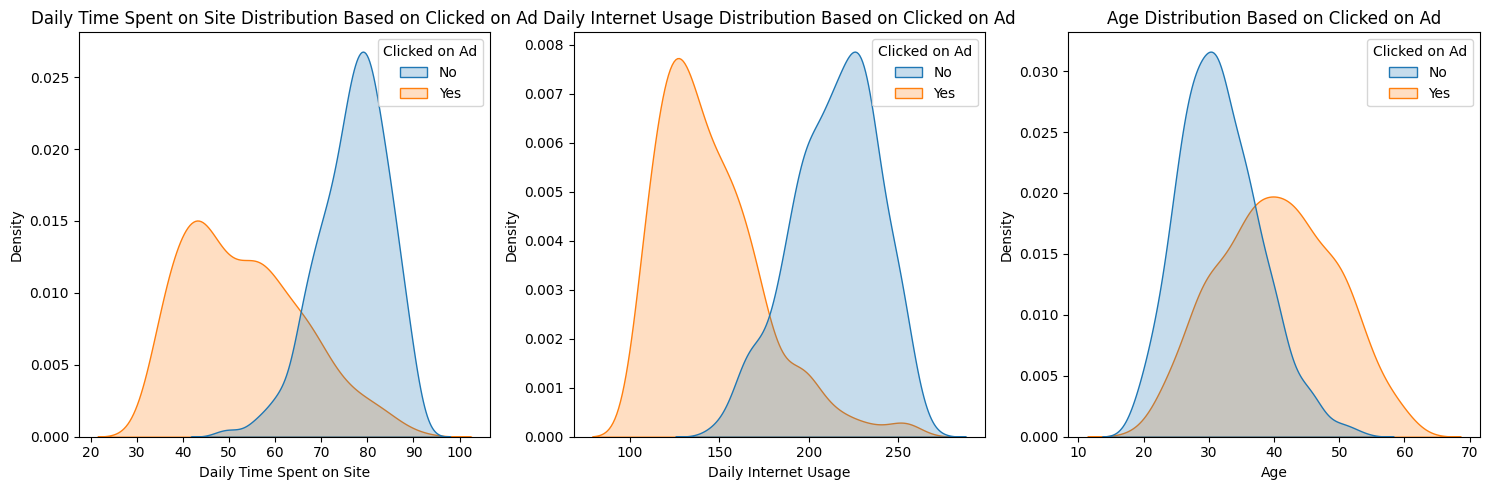

In [14]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']


colors = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(data=df, x=feats[i], hue='Clicked on Ad', fill=True, palette=colors)
    plt.title(f'{feats[i]} Distribution Based on Clicked on Ad')

plt.tight_layout()
plt.show()


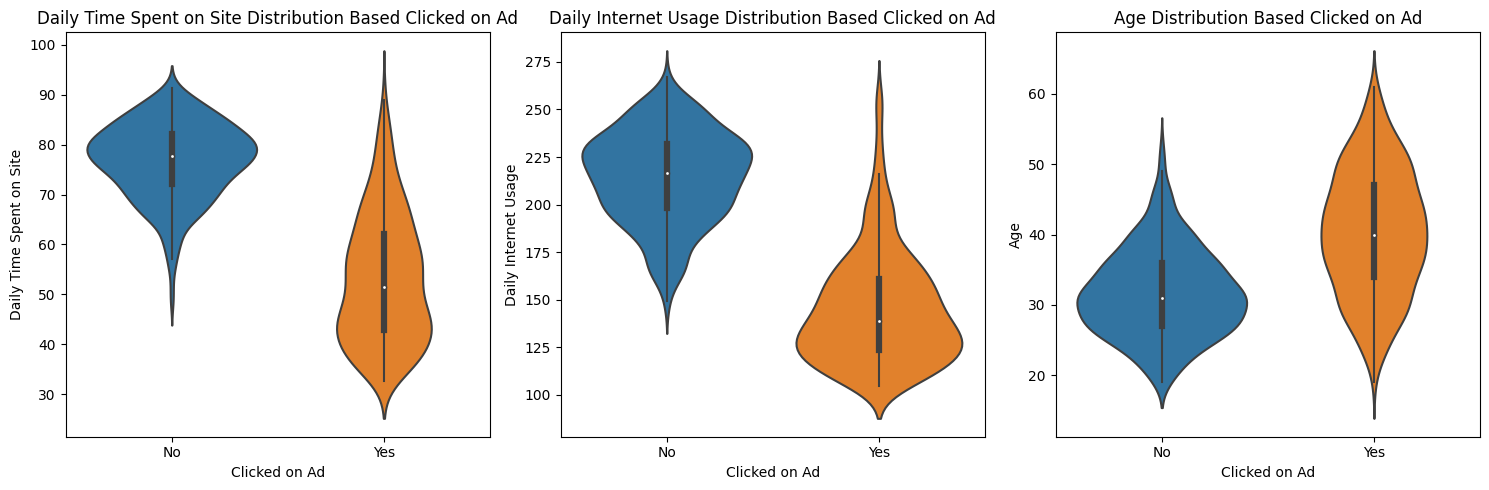

In [15]:
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

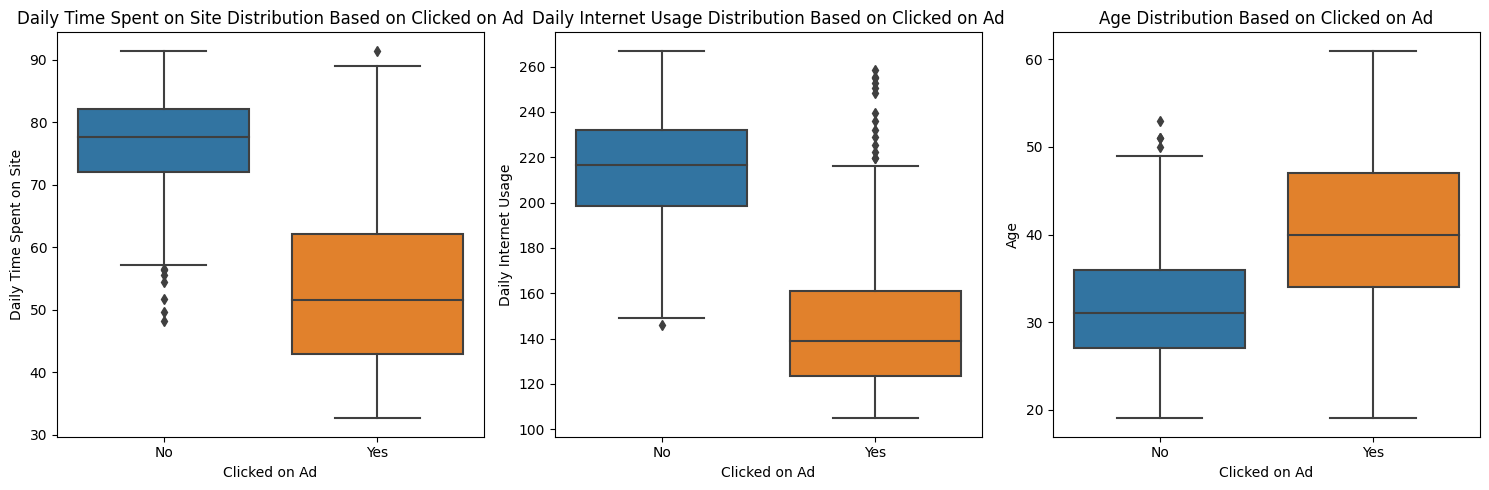

In [16]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=feats[i], x='Clicked on Ad', orient='v', palette=colors)
    plt.title(f'{feats[i]} Distribution Based on Clicked on Ad')

plt.tight_layout()
plt.show()


**Categorical Feature and Click on Ads**

In [17]:
def ratio_with_target(feats):
    ratio_df = df.groupby([feats,'Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
    ratio_df.columns = [feats,'Clicked on Ad','total']
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.total/x.total.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
    return ratio_df

def cat_visualization(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,7))


    ax[0].set_title(f'Clicked on Ad Distribution by {judul}\n', fontsize=14)
    sns.countplot(y=fitur, data = df, hue = 'Clicked on Ad', ax=ax[0], palette = ['#1f77b4', '#ff7f0e'],
                 order = df[fitur].value_counts().index)
    ax[0].bar_label(ax[0].containers[0], fontsize=11)
    ax[0].bar_label(ax[0].containers[1], fontsize=11)
    # ax[0].set_yticks([])
    # ax[0].tick_params(axis='x', rotation=90)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')


    ax[1].set_title(f'Pecentage of Clicked on Ad by {judul}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, ax=ax[1], color = ['#1f77b4', '#ff7f0e'])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2),
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

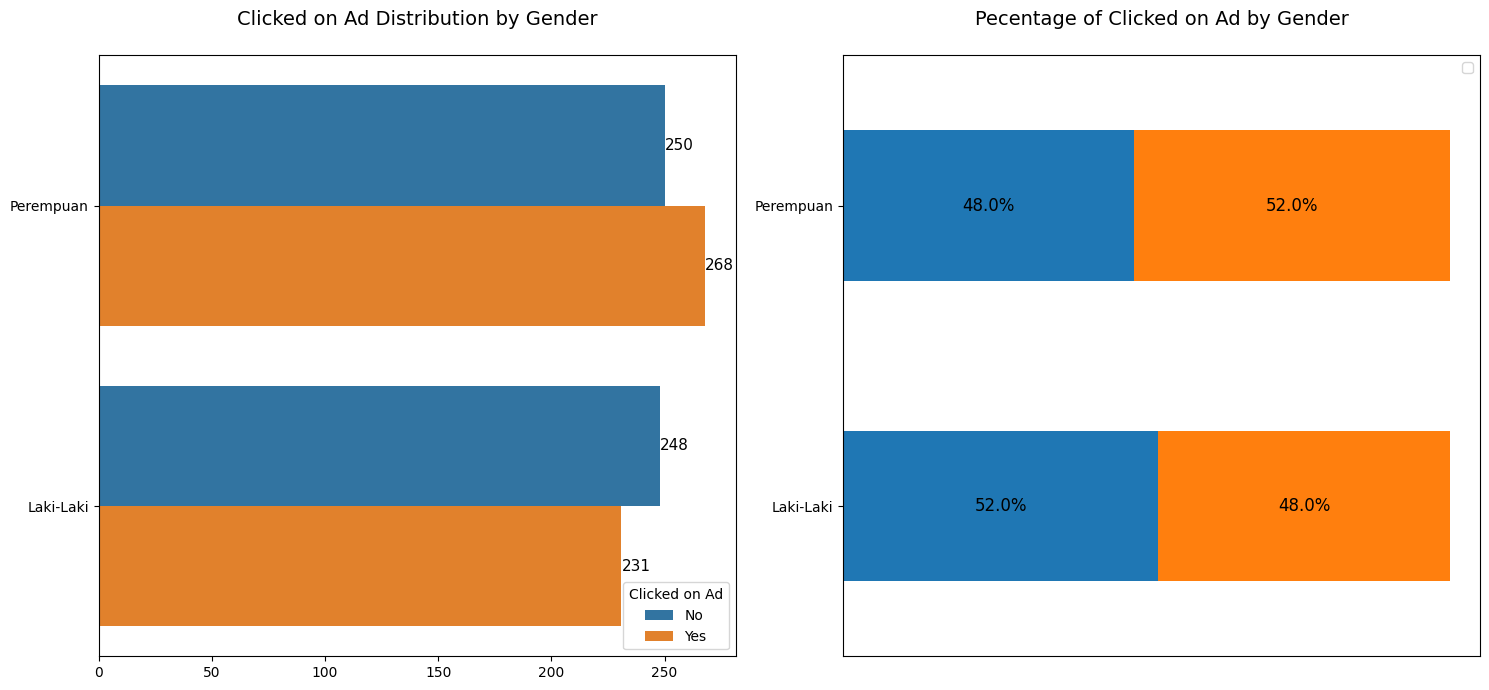

In [18]:
cat_visualization('Male', 'Gender')

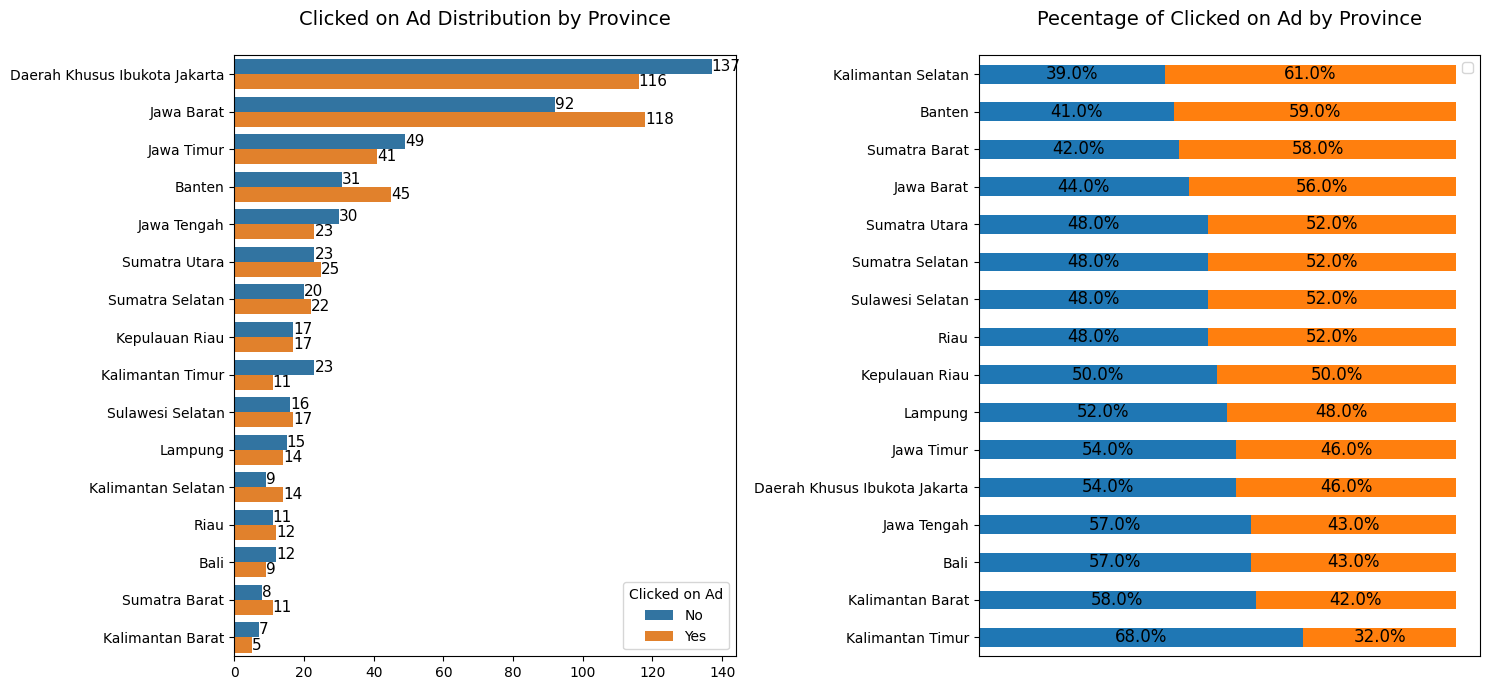

In [19]:
cat_visualization('province', 'Province')

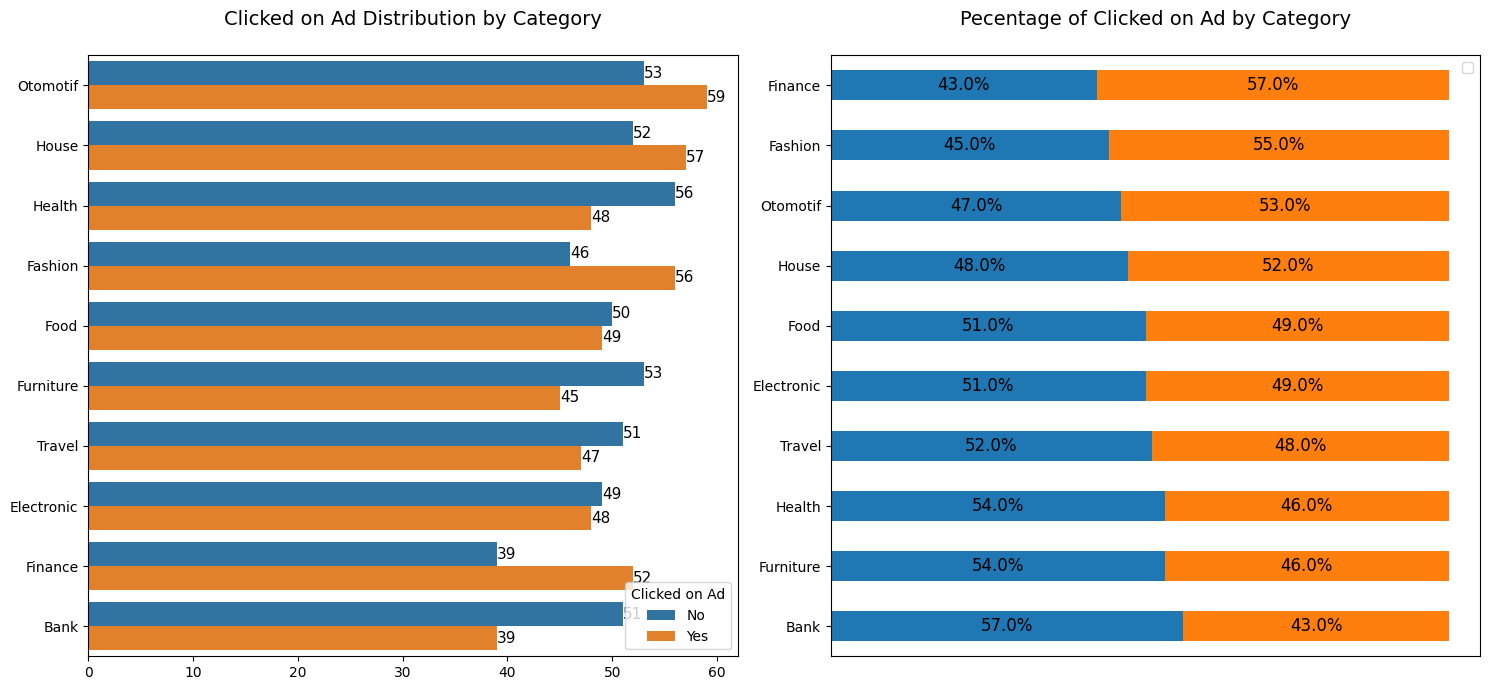

In [20]:
cat_visualization('category', 'Category')

**Sessions and Click on Ads**

In [21]:
df1 = df.copy()

In [22]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Month'] = df1['Timestamp'].dt.month
df1['Week_day'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour
df1 = df1.drop(['Timestamp'], axis=1)

**Monthly**

<Axes: xlabel='Month', ylabel='count'>

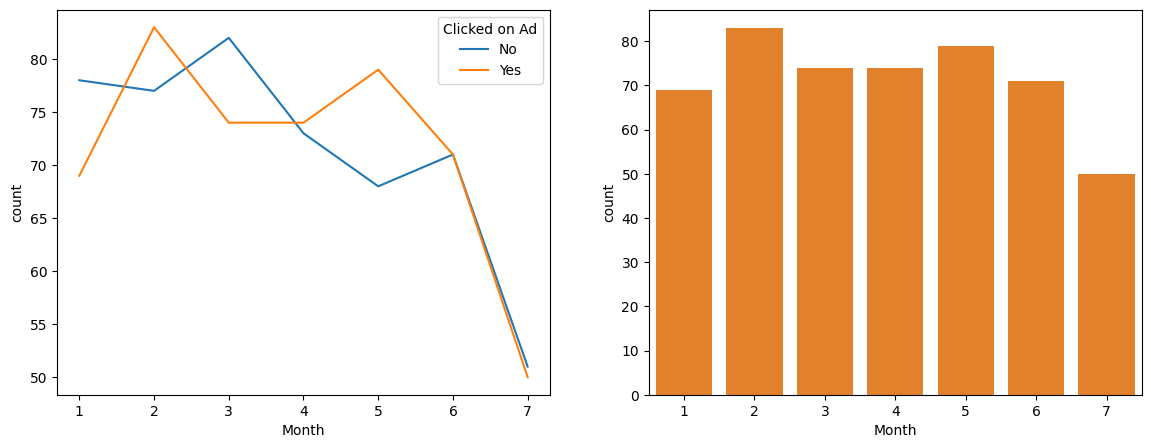

In [23]:
clicked_per_month = df1.groupby(['Month', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_month.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_month.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Month', y='count', hue='Clicked on Ad', data=clicked_per_month, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Month', color='#ff7f0e', ax = ax[1])

**Days in Week**

<Axes: xlabel='Week_day', ylabel='count'>

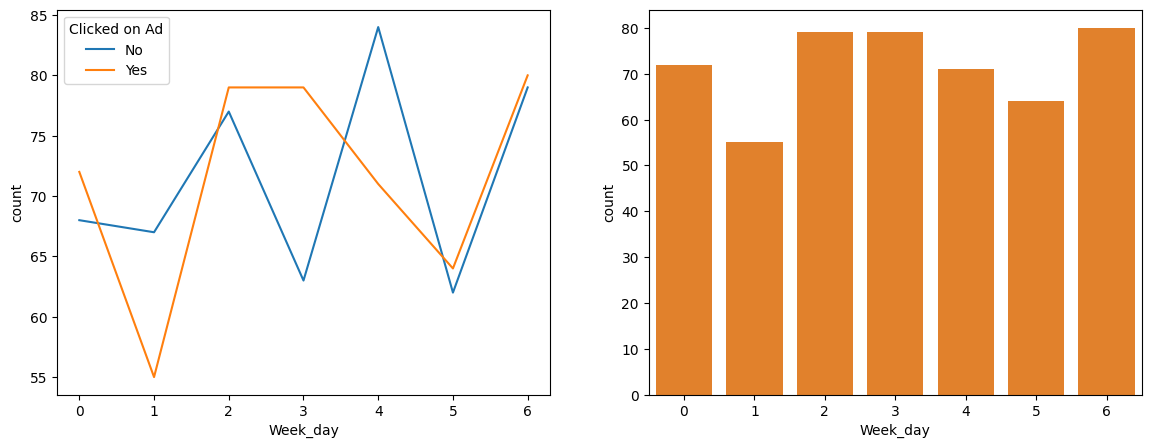

In [24]:
clicked_per_wkday = df1.groupby(['Week_day', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_wkday.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_wkday.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Week_day', y='count', hue='Clicked on Ad', data=clicked_per_wkday, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Week_day', color='#ff7f0e', ax = ax[1])

**Hourly**

<Axes: xlabel='Hour', ylabel='count'>

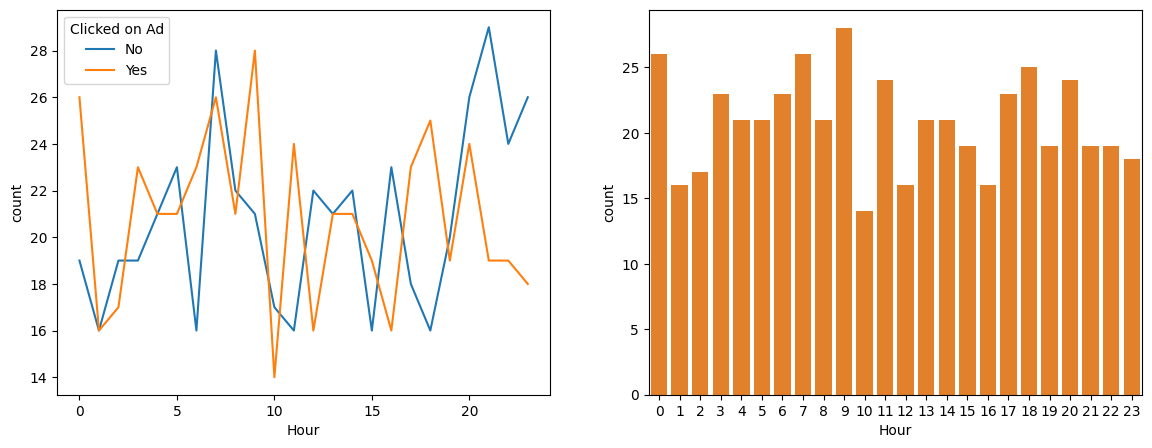

In [25]:
clicked_per_hr = df1.groupby(['Hour', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_hr.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_hr.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Hour', y='count', hue='Clicked on Ad', data=clicked_per_hr, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Hour', color='#ff7f0e', ax = ax[1])

**Pairplot Analysis**

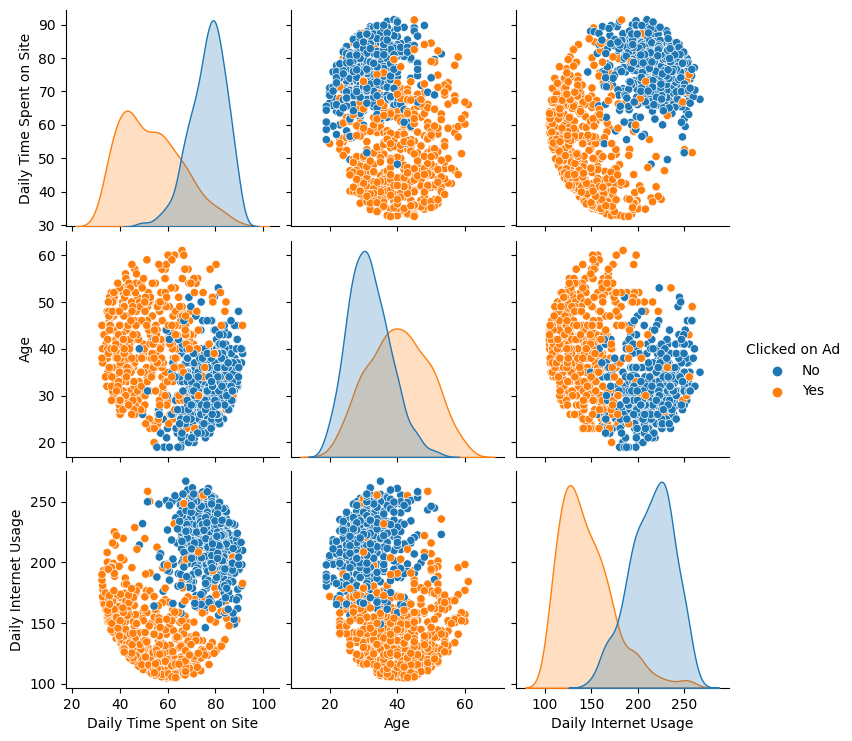

In [26]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']
sns.pairplot(data=df1, vars=feats, hue='Clicked on Ad')

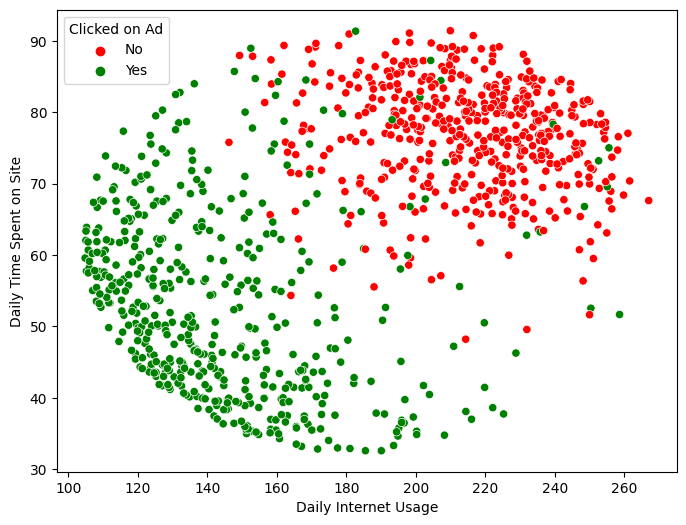

In [27]:
plt.figure(figsize=(8, 6))
custom_palette = ["red", "green"]
sns.set_palette(custom_palette)
sns.scatterplot(x=df['Daily Internet Usage'], y=df['Daily Time Spent on Site'], hue=df['Clicked on Ad'])
plt.show()


In [28]:
df1['Clicked on Ad'] = df1['Clicked on Ad'].map({'Yes':1, 'No':0})

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

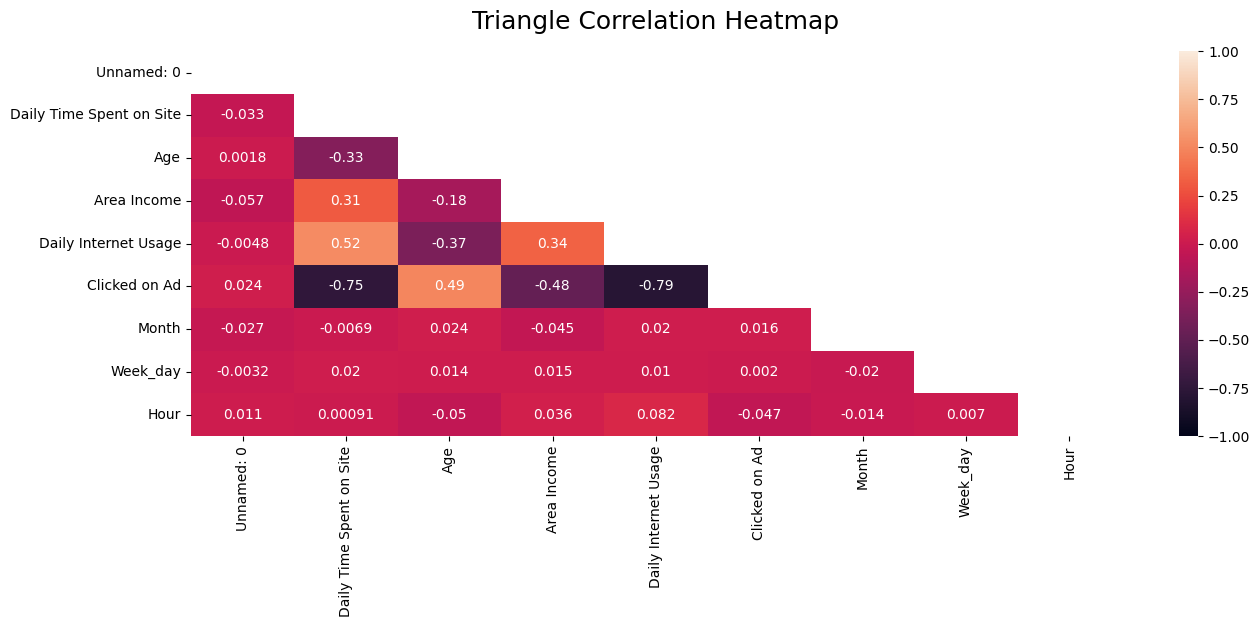

In [29]:
plt.figure(figsize=(15, 5))

mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

**Data Preprocessing**

In [30]:
df_cleaned = df1

In [31]:
df_cleaned.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
city                         0
province                     0
category                     0
Month                        0
Week_day                     0
Hour                         0
dtype: int64

In [32]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [33]:
df_cleaned['Male'].fillna(df_cleaned['Male'].mode()[0], inplace = True)

In [34]:
df_cleaned.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Week_day                    0
Hour                        0
dtype: int64

**Feature Encoding**

In [35]:
df_prep = df_cleaned

In [36]:
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

In [37]:
df_prep['province'].unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [38]:

df_prep['Pulau'] = np.where((((df_prep['province']) == 'Daerah Khusus Ibukota Jakarta')
                             | ((df_prep['province']) == 'Jawa Timur')
                             | ((df_prep['province']) =='Jawa Barat')
                             | ((df_prep['province']) =='Banten')
                             | ((df_prep['province']) =='Jawa Tengah')), 'Jawa',
                            np.where(((df_prep['province']) == 'Kepulauan Riau')
                                     | ((df_prep['province']) == 'Sumatra Utara')
                                     | ((df_prep['province']) == 'Lampung')
                                     | ((df_prep['province']) == 'Sumatra Barat')
                                     | ((df_prep['province']) == 'Sumatra Selatan'), 'Sumatra',
                                     np.where(((df_prep['province']) == 'Kalimantan Barat')
                                              | ((df_prep['province']) == 'Kalimantan Selatan')
                                              | ((df_prep['province']) == 'Kalimantan Timur')
                                              | ((df_prep['province']) == 'Kalimantan'), 'Kalimantan',
                                              np.where(((df_prep['province']) == 'Bali'), 'Bali',
                                              'Sulawesi'))))

In [39]:
df_prep['Pulau'].value_counts()

Jawa          682
Sumatra       172
Kalimantan     69
Sulawesi       56
Bali           21
Name: Pulau, dtype: int64

In [40]:
df_prep = pd.get_dummies(df_prep, columns=['Pulau'])

In [41]:
df_prep = pd.get_dummies(df_prep, columns=['category'])

In [42]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   Month                     1000 non-null   int64  
 10  Week_day                  1000 non-null   int64  
 11  Hour                      1000 non-null   int64  
 12  Pulau_Bali                1000 non-null   uint8  
 13  Pulau_Jawa                1000 non-null   uint8  
 14  Pulau_Kal

**Feature Selection**

In [43]:
df_prep.drop(columns = ['Unnamed: 0', 'city', 'province'], inplace=True)

In [44]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Week_day                  1000 non-null   int64  
 8   Hour                      1000 non-null   int64  
 9   Pulau_Bali                1000 non-null   uint8  
 10  Pulau_Jawa                1000 non-null   uint8  
 11  Pulau_Kalimantan          1000 non-null   uint8  
 12  Pulau_Sulawesi            1000 non-null   uint8  
 13  Pulau_Sumatra             1000 non-null   uint8  
 14  category_

In [45]:
df_prep.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Week_day,Hour,Pulau_Bali,Pulau_Jawa,Pulau_Kalimantan,Pulau_Sulawesi,Pulau_Sumatra,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
787,59.96,33,540005270.0,197.66,0,1,1,3,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
434,83.55,39,460714660.0,221.18,1,0,6,2,20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
255,81.03,28,446092500.0,201.15,0,0,1,2,13,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


**Modeling - Split and Train Test**

In [46]:
df_model = df_prep.copy()

In [47]:
X = df_model.drop(columns='Clicked on Ad').copy()
y = df_model['Clicked on Ad'].copy()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [49]:
print('Split 70:30')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Split 70:30
Total rows & column of train set: (700, 23)
Total rows & column of test set: (300, 23)


In [50]:
y_train.value_counts()

0    354
1    346
Name: Clicked on Ad, dtype: int64

**Modeling - Define Function for Experiment**

In [51]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


def experiment(X_train, X_test, y_train, y_test):
    models = [
        ('Logistic Regression', LogisticRegression(random_state=1)),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=1)),
        ('SVC', SVC(random_state=1)),
        ('Random Forest', RandomForestClassifier(random_state=1)),
        ('AdaBoost', AdaBoostClassifier(random_state=1)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
        ('MLP', MLPClassifier(random_state=1)),
        ('XGBoost', XGBClassifier(random_state=1)),
        ('LGBM', LGBMClassifier(random_state=1))
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        duration = (dt.now()-start).total_seconds()

        # evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result.append((name, accuracy, precision, recall, f1, duration))

    df_comparison = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Duration'])
    return df_comparison

**Mechine Learning Model Without Normalization/Standardization**

In [52]:
exp1 = experiment(X_train, X_test, y_train, y_test)
exp1.sort_values(by='Accuracy', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 346, number of negative: 354
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494286 -> initscore=-0.022858
[LightGBM] [Info] Start training from score -0.022858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,Model,Accuracy,Precision,Recall,F1,Duration
4,Random Forest,0.960000,0.993056,0.928571,0.959732,0.190553
6,Gradient Boosting,0.953333,0.986111,0.922078,0.953020,0.159769
8,XGBoost,0.950000,0.979310,0.922078,0.949833,0.116829
9,LGBM,0.950000,0.986014,0.915584,0.949495,0.090303
2,Decision Tree,0.946667,0.966216,0.928571,0.947020,0.006189
5,AdaBoost,0.940000,0.978873,0.902597,0.939189,0.087631
3,SVC,0.686667,0.800000,0.519481,0.629921,0.039015
1,KNN,0.650000,0.689922,0.577922,0.628975,0.167029
0,Logistic Regression,0.486667,0.000000,0.000000,0.000000,0.031669
7,MLP,0.486667,0.000000,0.000000,0.000000,0.048048


**Mechine Learning Model With Normalization/Standardization**

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [54]:
exp2 = experiment(X_train_scaled, X_test_scaled, y_train, y_test)
exp2.sort_values(by='Accuracy', ascending=False)

[LightGBM] [Info] Number of positive: 346, number of negative: 354
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494286 -> initscore=-0.022858
[LightGBM] [Info] Start training from score -0.022858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,Accuracy,Precision,Recall,F1,Duration
4,Random Forest,0.960000,0.986301,0.935065,0.960000,0.158266
8,XGBoost,0.956667,0.979592,0.935065,0.956811,0.043368
3,SVC,0.953333,0.986111,0.922078,0.953020,0.016994
6,Gradient Boosting,0.953333,0.979452,0.928571,0.953333,0.148468
7,MLP,0.953333,0.979452,0.928571,0.953333,0.524479
0,Logistic Regression,0.950000,0.972789,0.928571,0.950166,0.013650
9,LGBM,0.950000,0.979310,0.922078,0.949833,0.072149
2,Decision Tree,0.943333,0.959732,0.928571,0.943894,0.003495
5,AdaBoost,0.936667,0.959184,0.915584,0.936877,0.087073
1,KNN,0.886667,0.968750,0.805195,0.879433,0.016458


**Model Evaluation**

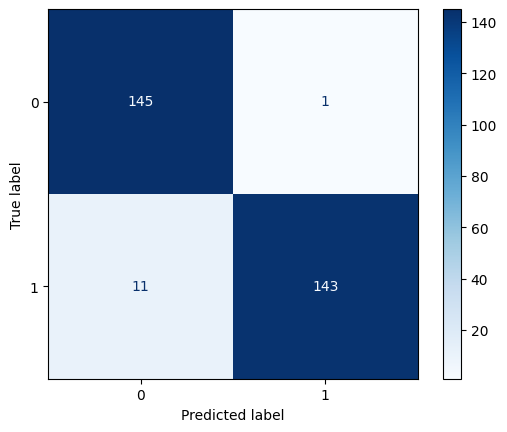

In [64]:
final_model = RandomForestClassifier(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap="Blues")
plt.show()


**Feature Importance with SHAP**

In [56]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00


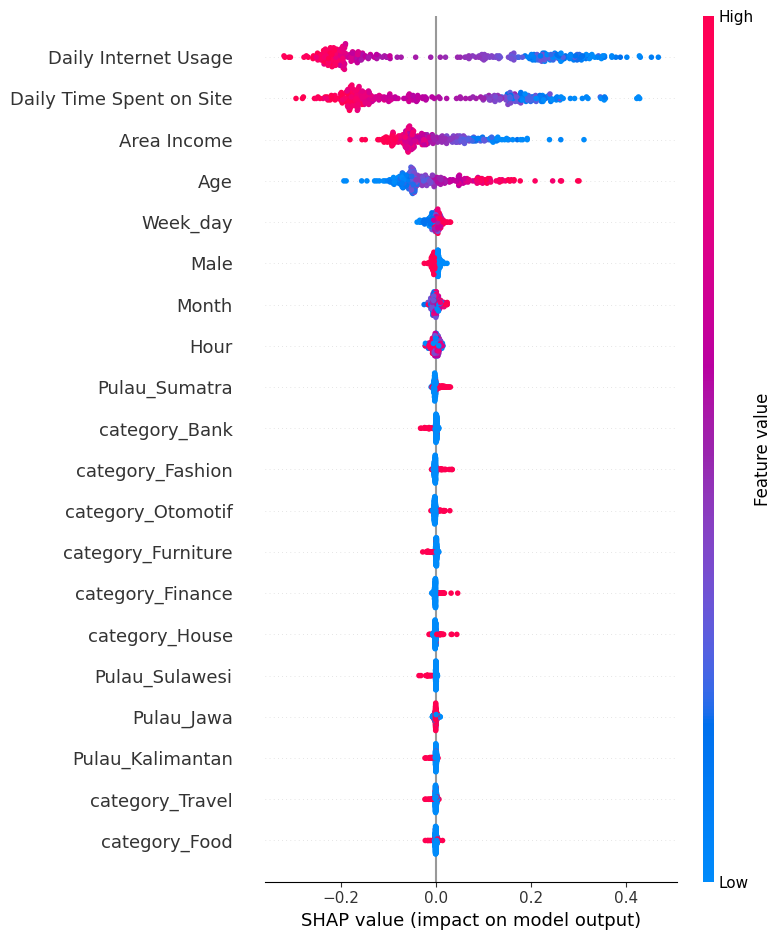

In [57]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

**Save Model Mechine Learning - Dump & Load Trained Model**

In [58]:
import joblib

joblib.dump(final_model, 'clicked_ads_classifier_randomforest.joblib')

['clicked_ads_classifier_randomforest.joblib']

In [59]:
production_model = joblib.load('clicked_ads_classifier_randomforest.joblib')